In [29]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression

In [30]:
# loading dataset
data = pd.read_csv("MallCustomers.csv")

print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [31]:
# data cleaning
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)

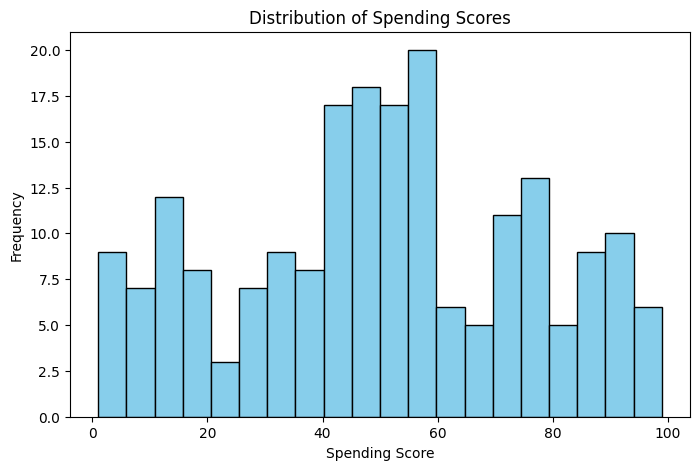

In [32]:
# Histogram -> spending score distribution
plt.figure(figsize=(8, 5))
plt.hist(data['Spending Score (1-100)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Spending Scores')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.show()

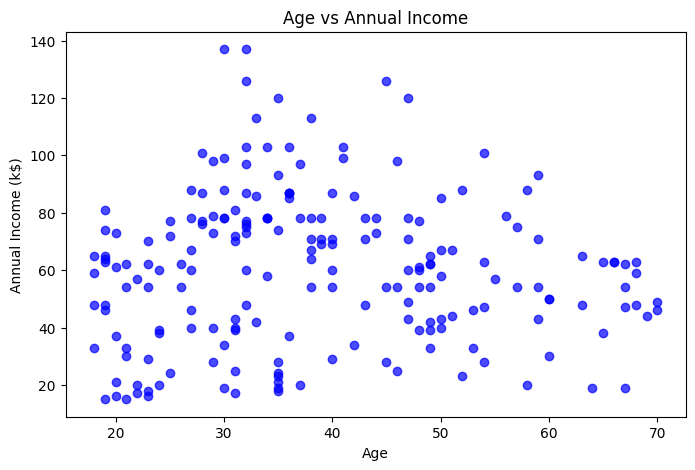

In [33]:
# scatter plot -> Age vs Annual Income
plt.figure(figsize=(8, 5))
plt.scatter(data['Age'], data['Annual Income (k$)'], color='blue', alpha=0.7)
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

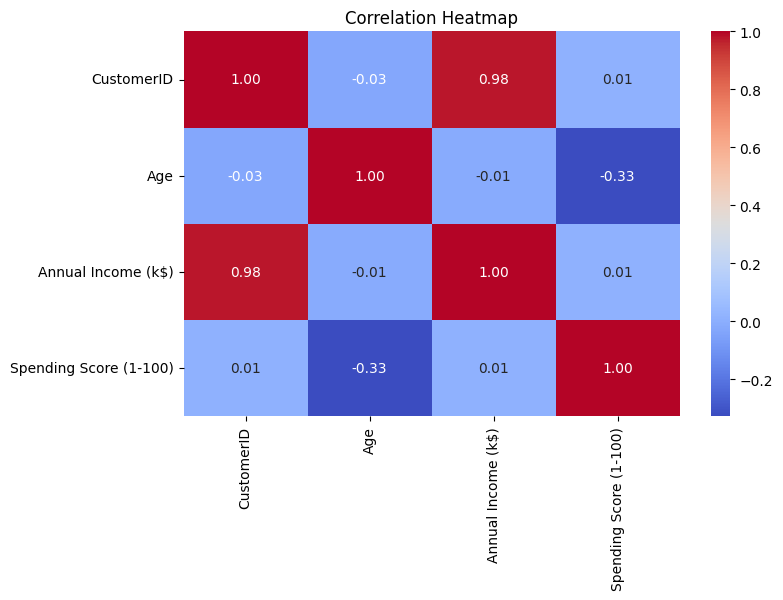

In [34]:
# heatmap -> correlation matrix
plt.figure(figsize=(8, 5))
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

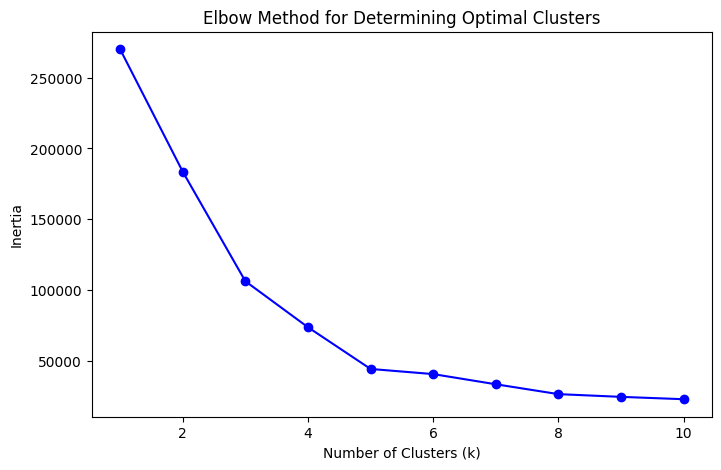

In [35]:
# K-Means Clustering Analysis
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Determine Optimal Clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Determining Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

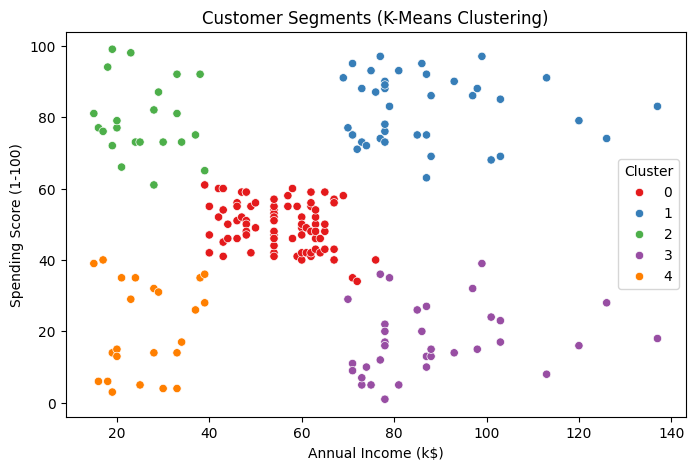

In [36]:
# Apply K-Means with Number of Clusters
clusters = 5
kmeans = KMeans(n_clusters=clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(features)

# Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1',
    data=data
)

plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

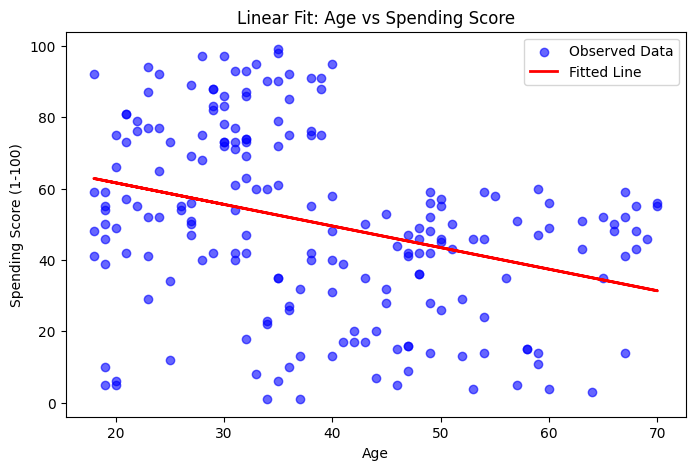

In [37]:
# fitting: Age vs Spending Score
X = data[['Age']]
y = data['Spending Score (1-100)']
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

# plot
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Observed Data', alpha=0.6)
plt.plot(X, y_pred, color='red', label='Fitted Line', linewidth=2)
plt.title('Linear Fit: Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()